In [41]:
pip install soccerplots

#**RADAR PLOT**

**Importing required libraries**

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar 

**Reading in the data**

In [43]:
df = pd.read_csv('player_data.csv')

In [44]:
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,30-185,1990,13.7,0,15,5,33.3,1.09,0.36,0.00,0.00,20.6,3,0,0,0.8,0.8,0.05,-0.8,-0.8,Matches
1,2,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,23-151,1997,11.3,6,31,13,41.9,2.73,1.15,0.19,0.46,9.9,0,0,0,5.6,5.6,0.18,0.4,0.4,Matches
2,3,Che Adams\Che-Adams,eng ENG,FW,Southampton,24-232,1996,21.2,4,40,18,45.0,1.89,0.85,0.10,0.22,13.5,0,0,0,5.3,5.3,0.13,-1.3,-1.3,Matches
3,4,Tosin Adarabioyo\Tosin-Adarabioyo,eng ENG,DF,Fulham,23-159,1997,22.0,0,17,4,23.5,0.77,0.18,0.00,0.00,9.0,0,0,0,0.9,0.9,0.06,-0.9,-0.9,Matches
4,5,Adrián\Adrian,es ESP,GK,Liverpool,34-058,1987,3.0,0,0,0,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches


**Sorting players names**

In [45]:
df['Player'] = df['Player'].str.split('\\', expand=True)[0]

**Player variable**

In [46]:
player1='Harry Kane'
player2='Mohamed Salah'

**Creating player dataframe**

In [47]:
df = df[(df['Player']== player1) | (df['Player']== player2)].reset_index()

**Creating squad dataframe**

In [48]:
df_squad = df.drop(['Gls','Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG'], axis = 1)
df_squad.reset_index()
df_squad.head()

,index,Rk,Player,Nation,Pos,Squad,Age,Born,90s,FK,PK,PKatt,Matches
0,221,222,Harry Kane,eng ENG,FW,Tottenham,27-217,1993,22.4,7,3,3,Matches
1,398,399,Mohamed Salah,eg EGY,FW,Liverpool,28-260,1992,23.4,1,6,6,Matches


In [49]:
df = df.drop(['index','Rk', 'Nation','Pos','Age', 'Squad', 'Born','90s','PK', 'FK', 'PKatt', 'Matches'], axis=1)

In [50]:
df.columns

Index(['Player', 'Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh',
       'G/SoT', 'Dist', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG'],
      dtype='object')

**Squad variable**

In [51]:
squad1 = df_squad['Squad'][0]
squad1

'Tottenham'

In [52]:
squad2 = df_squad['Squad'][1]
squad2

'Liverpool'

**Get parameters**

In [53]:
params = list(df.columns)

params = params[1:]
params

    

['Gls',
 'Sh',
 'SoT',
 'SoT%',
 'Sh/90',
 'SoT/90',
 'G/Sh',
 'G/SoT',
 'Dist',
 'xG',
 'npxG',
 'npxG/Sh',
 'G-xG',
 'np:G-xG']

**Add ranges to list of tuple pairs**

In [54]:
 
ranges = []
a_values = []
b_values = []

In [55]:
for x in params:
        a = min(df[params][x])
        a = a - (a * 0.25)
        b = max(df[params][x])
        b = b + (b * 0.25)

        ranges.append((a,b))

for x in range(len(df['Player'])):
    if df['Player'][x] == player1:
        a_values = df.iloc[x].values.tolist()
    if df['Player'][x] == player2:
        b_values = df.iloc[x].values.tolist()


a_values = a_values[1:]
b_values = b_values[1:]

values  = [a_values, b_values]



**Title**

In [56]:
title = dict(
    title_name =player1,
    title_color = 'red',
    subtitle_name = squad1,
    subtitle_color = 'red',
    title_name_2 =player2,
    title_color_2 = 'blue',
    subtitle_name_2 = squad2,
    subtitle_color_2 = 'blue',
    title_fontsize = 18,
    subtitle_fontsize = 15
)







**End note**

In [57]:
endnote = 'Deji Yekeen \ndata via FBREF /   Statsbomb'

**Radar**

In [58]:
radar = Radar()

**Radar plot**

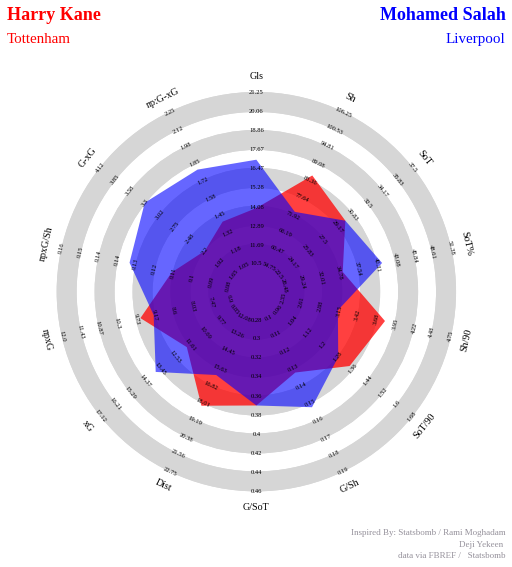

In [59]:
fig, ax = radar.plot_radar(ranges=ranges, params=params,values=values,
                            radar_color=['red','blue'],
                            alphas=[.75, .6],
                                title=title,
                                endnote=endnote,
                                compare=True)